# Snake

In [1]:
import environments_fully_observable 
import environments_partially_observable
import numpy as np
from  tqdm import trange
import matplotlib.pyplot as plt
import random
import tensorflow as tf
tf.random.set_seed(0)
random.seed(0)
np.random.seed(0)
import utils
import DQN
import doubleDQN
import AStar_Heuristic

## Environment definition

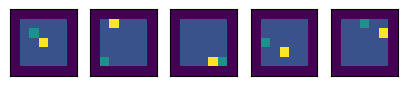

In [2]:
%matplotlib inline
# function to standardize getting an env for the whole notebook
def get_env(n=100, size = 10):
    # n is the number of boards that you want to simulate parallely
    # size is the size of each board, also considering the borders
    # mask for the partially observable, is the size of the local neighborhood
    e = environments_fully_observable.OriginalSnakeEnvironment(n, size)
    # e = environments_partially_observable.OriginalSnakeEnvironment(n, size, 2)
    return e
env_ = get_env(n=100, size=7)
GAMMA = .9
ITERATIONS = 3000

utils.display_boards(env_, 5)

## Model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 7, 32)          1184      
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 256)               803072    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 823780 (3.14 MB)
Trainable params: 823780 (3.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
GPU is not ava

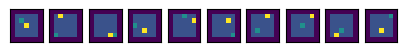

In [3]:
input_shape = env_.to_state().shape[1:]
DQN_agent = DQN.DQNAgent(input_shape= input_shape, num_actions= 4, gamma= GAMMA)
Double_DQN_agent = doubleDQN.DoubleDQNAgent(input_shape= input_shape, num_actions= 4, gamma= GAMMA)
if tf.config.list_physical_devices('GPU'):
    print('GPU is available.')
else:
    print('GPU is not available. Switching to CPU.')

utils.display_boards(env_, 10)


## Training

In [ ]:
print("DQN: ",DQN_agent.q_model.get_weights())
print("Double DQN: ",Double_DQN_agent.q_model.get_weights())

In [4]:
# env_ = get_env(n=100, size=10) 
# ITERATIONS = 10000
Double_DQN_agent.train(env_, ITERATIONS, 64)
# DQN_agent.train(env_, ITERATIONS, 64)

1/1 [==============================] - 0s 18ms/step
Epoch: 1/3000 | Epsilon: 0.995
1/1 [==============================] - 0s 19ms/step
Epoch: 2/3000 | Epsilon: 0.990
1/1 [==============================] - 0s 20ms/step
Epoch: 3/3000 | Epsilon: 0.985
1/1 [==============================] - 0s 18ms/step
Epoch: 4/3000 | Epsilon: 0.980
1/1 [==============================] - 0s 17ms/step
Epoch: 5/3000 | Epsilon: 0.975
1/1 [==============================] - 0s 18ms/step
Epoch: 6/3000 | Epsilon: 0.970
1/1 [==============================] - 0s 19ms/step
Epoch: 7/3000 | Epsilon: 0.966
1/1 [==============================] - 0s 19ms/step
Epoch: 8/3000 | Epsilon: 0.961
1/1 [==============================] - 0s 18ms/step
Epoch: 9/3000 | Epsilon: 0.956
1/1 [==============================] - 0s 18ms/step
Epoch: 10/3000 | Epsilon: 0.951
1/1 [==============================] - 0s 18ms/step
Epoch: 11/3000 | Epsilon: 0.946
1/1 [==============================] - 0s 19ms/step
Epoch: 12/3000 | Epsilon: 0.942
1

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 2/100 [00:00<00:07, 13.18it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 4/100 [00:00<00:07, 13.40it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 6/100 [00:00<00:06, 13.55it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 8/100 [00:00<00:06, 13.60it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 10/100 [00:00<00:06, 13.66it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 12/100 [00:00<00:06, 13.19it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 14/100 [00:01<00:06, 13.38it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█▌        | 16/100 [00:01<00:06, 13.55it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 18/100 [00:01<00:06, 13.46it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 20/100 [00:01<00:05, 13.50it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 22/100 [00:01<00:05, 13.50it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 24/100 [00:01<00:05, 13.26it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 26/100 [00:01<00:05, 13.35it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 28/100 [00:02<00:12,  5.62it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 30/100 [00:02<00:10,  6.84it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 32/100 [00:03<00:08,  7.77it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 34/100 [00:03<00:07,  8.91it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 36/100 [00:03<00:06,  9.94it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 38/100 [00:03<00:05, 10.81it/s]

1/1 [==============================] - 0s 18ms/step


 40%|████      | 40/100 [00:03<00:05, 11.46it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 42/100 [00:03<00:04, 12.01it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 44/100 [00:03<00:04, 12.40it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 46/100 [00:04<00:04, 12.64it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 48/100 [00:04<00:04, 12.87it/s]

1/1 [==============================] - 0s 19ms/step


 50%|█████     | 50/100 [00:04<00:05,  8.45it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 52/100 [00:04<00:05,  9.49it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 54/100 [00:05<00:04, 10.38it/s]

1/1 [==============================] - 0s 18ms/step


 56%|█████▌    | 56/100 [00:05<00:04, 10.88it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 58/100 [00:05<00:03, 11.54it/s]

1/1 [==============================] - 0s 17ms/step


 60%|██████    | 60/100 [00:05<00:03, 12.08it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 62/100 [00:05<00:03, 12.46it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▍   | 64/100 [00:05<00:02, 12.74it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 66/100 [00:05<00:02, 12.72it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 68/100 [00:06<00:02, 12.78it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 70/100 [00:06<00:02, 12.96it/s]

1/1 [==============================] - 0s 18ms/step


 72%|███████▏  | 72/100 [00:06<00:02, 12.39it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 74/100 [00:06<00:02, 12.66it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 76/100 [00:06<00:02,  8.21it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 78/100 [00:07<00:02,  9.32it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 80/100 [00:07<00:01, 10.28it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 82/100 [00:07<00:01, 11.08it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 84/100 [00:07<00:01, 11.75it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▌ | 86/100 [00:07<00:01, 12.20it/s]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 88/100 [00:07<00:00, 12.60it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 90/100 [00:08<00:00, 12.75it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 92/100 [00:08<00:00, 12.24it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▍| 94/100 [00:08<00:00, 12.59it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 96/100 [00:08<00:00, 12.85it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 98/100 [00:08<00:00, 13.04it/s]

1/1 [==============================] - 0s 16ms/step


100%|██████████| 100/100 [00:08<00:00, 11.36it/s]


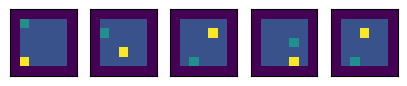

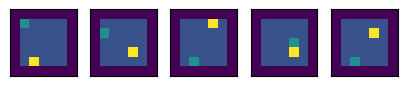

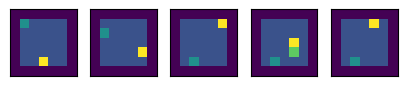

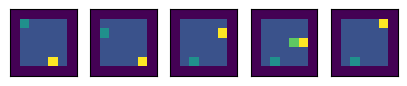

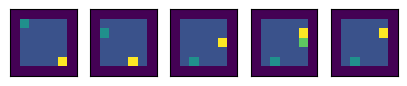

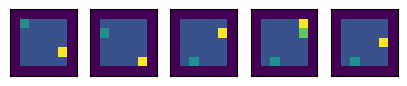

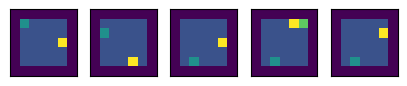

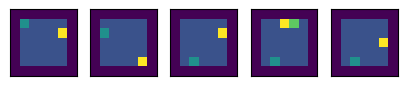

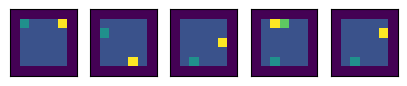

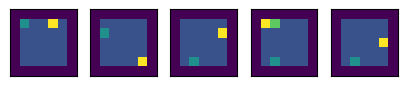

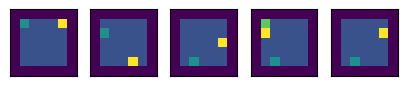

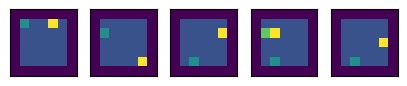

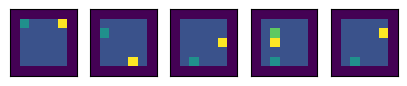

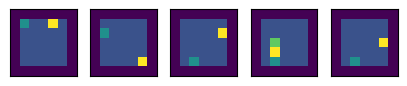

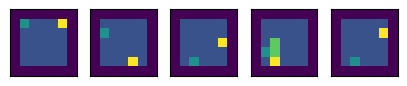

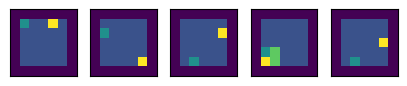

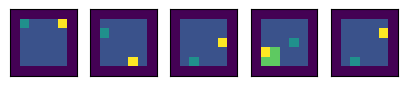

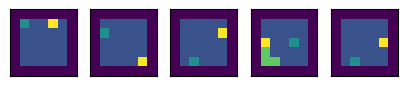

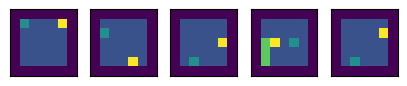

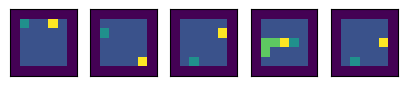

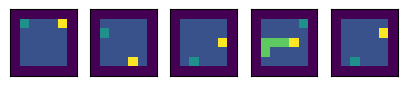

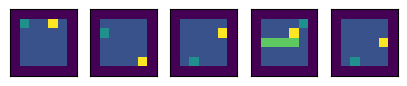

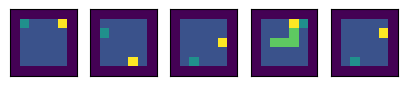

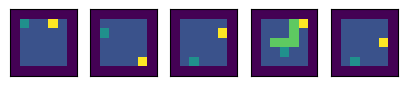

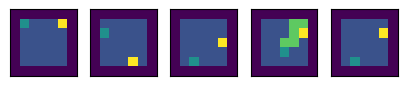

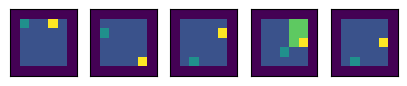

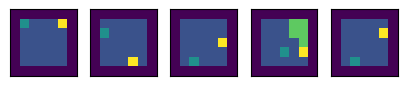

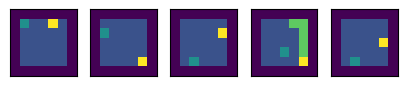

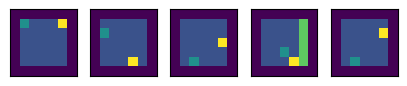

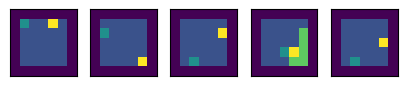

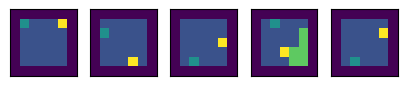

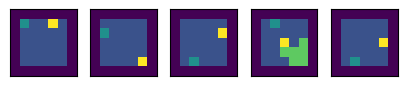

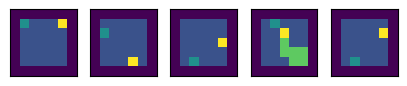

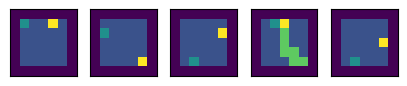

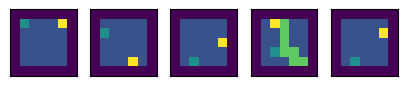

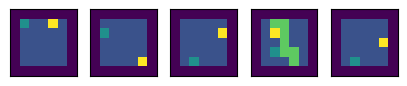

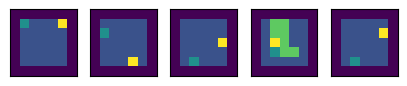

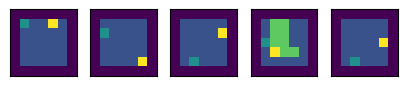

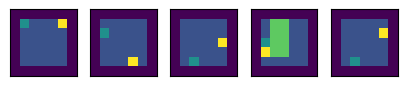

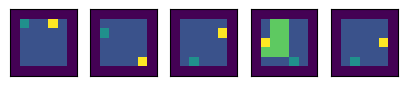

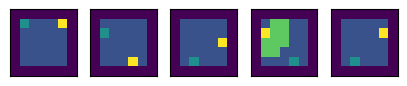

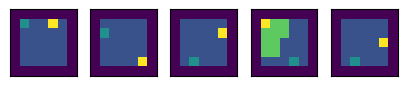

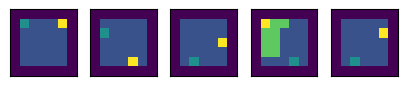

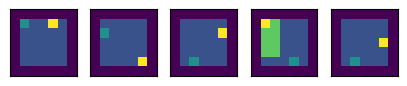

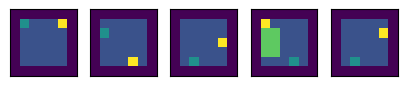

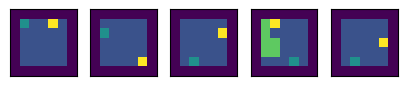

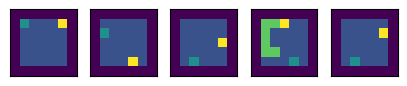

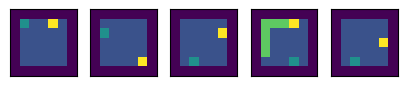

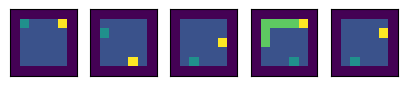

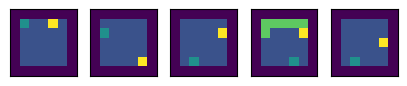

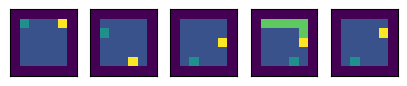

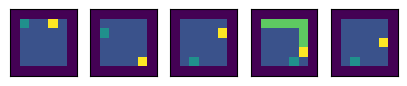

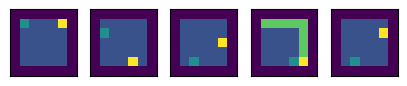

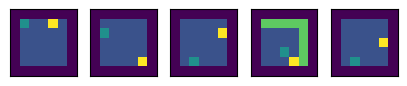

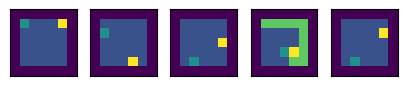

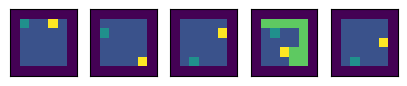

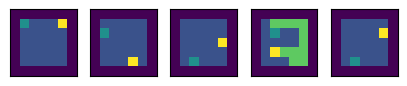

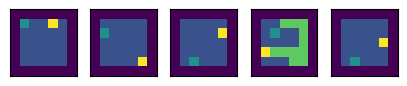

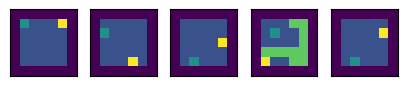

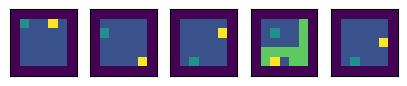

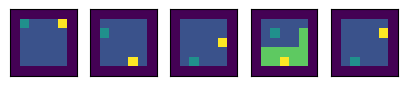

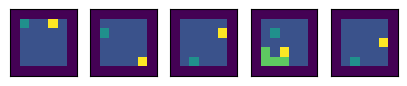

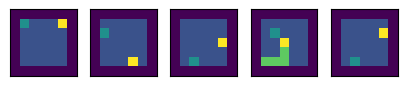

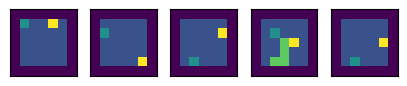

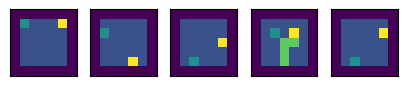

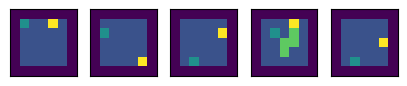

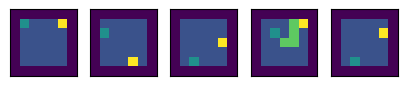

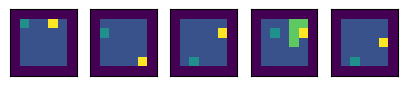

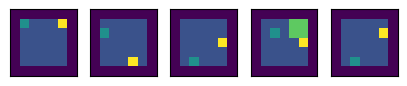

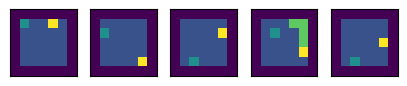

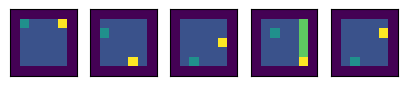

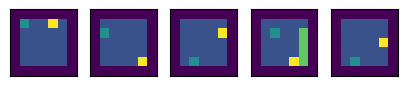

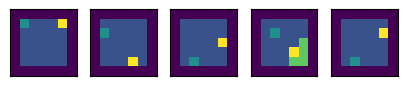

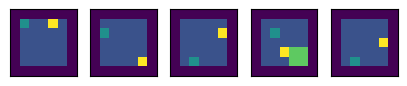

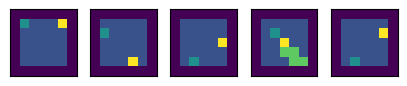

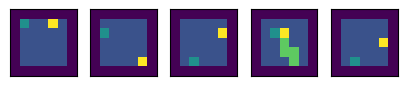

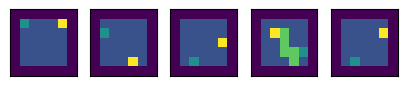

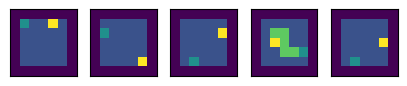

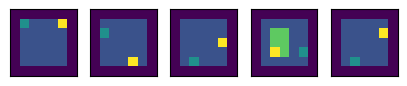

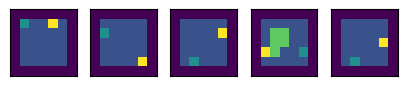

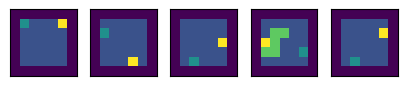

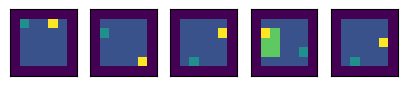

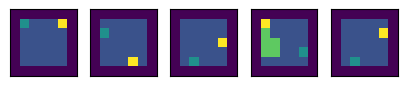

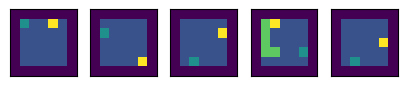

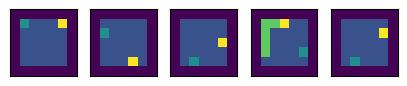

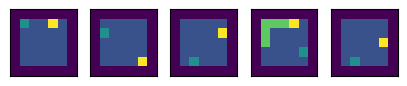

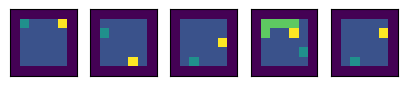

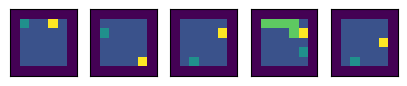

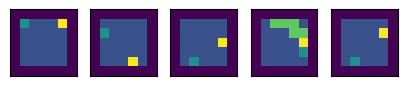

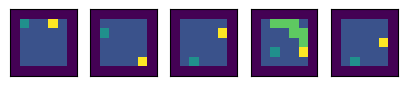

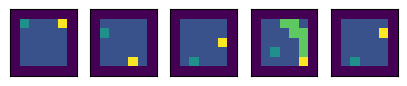

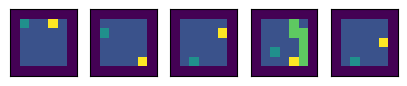

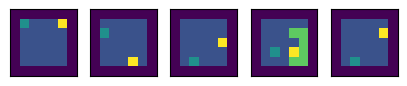

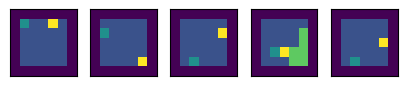

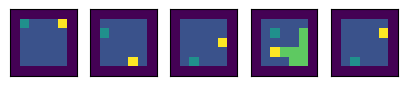

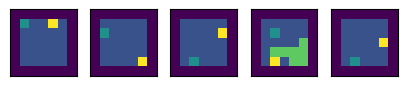

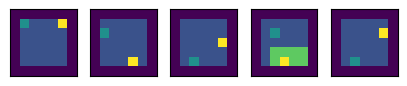

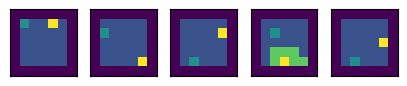

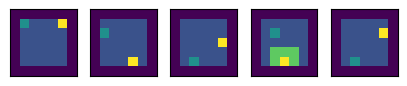

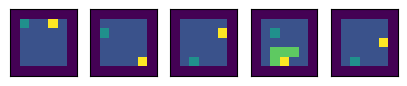

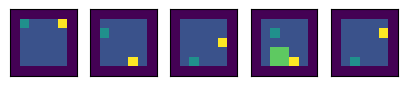

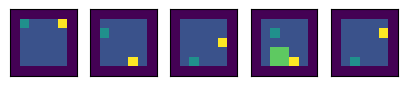

In [6]:
env_test = get_env(n=5, size=7)
input_shape_test = env_test.to_state().shape[1:]
GAMMA = .9
ITERATIONS = 100
utils.display_boards(env_test, 5)
Double_DQN_agent.play(env_test, ITERATIONS)
utils.display_boards(env_test, 5)

  0%|          | 0/50 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 2/50 [00:00<00:03, 14.67it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 4/50 [00:00<00:02, 15.74it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 6/50 [00:00<00:02, 16.10it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 8/50 [00:00<00:02, 16.34it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 10/50 [00:01<00:07,  5.21it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 12/50 [00:01<00:05,  6.65it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 14/50 [00:01<00:04,  8.20it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 16/50 [00:01<00:03,  9.43it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 18/50 [00:01<00:02, 10.87it/s]

1/1 [==============================] - 0s 17ms/step


d:\UNIPD\reinforcement learning\RL_Snake\utils.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axs=plt.subplots(1,min(len(env.boards), n), figsize=(5,5))
 40%|████      | 20/50 [00:01<00:02, 12.18it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 22/50 [00:02<00:02, 12.99it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 24/50 [00:02<00:01, 13.27it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 26/50 [00:02<00:01, 12.68it/s]

1/1 [==============================] - 0s 20ms/step


 56%|█████▌    | 28/50 [00:02<00:01, 13.17it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 30/50 [00:02<00:01, 13.34it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 32/50 [00:02<00:01, 13.14it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 34/50 [00:03<00:01, 12.85it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 36/50 [00:03<00:01, 12.94it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 38/50 [00:03<00:00, 13.49it/s]

1/1 [==============================] - 0s 20ms/step


 80%|████████  | 40/50 [00:03<00:00, 14.01it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 42/50 [00:03<00:00, 13.52it/s]

1/1 [==============================] - 0s 17ms/step


 88%|████████▊ | 44/50 [00:03<00:00, 14.12it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 46/50 [00:03<00:00, 14.56it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 48/50 [00:04<00:00, 14.94it/s]

1/1 [==============================] - 0s 18ms/step


100%|██████████| 50/50 [00:04<00:00, 12.10it/s]


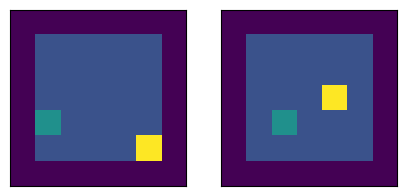

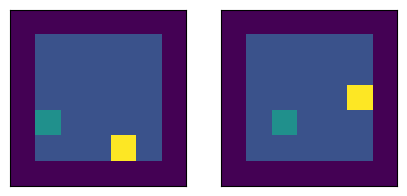

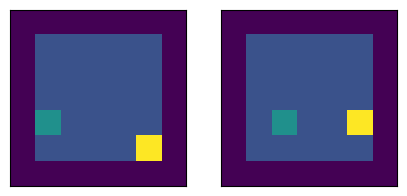

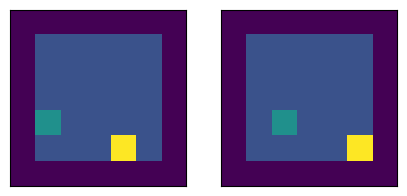

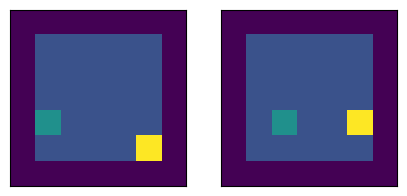

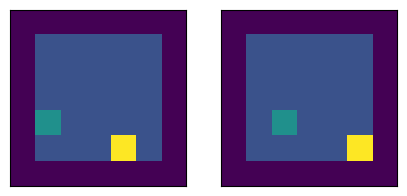

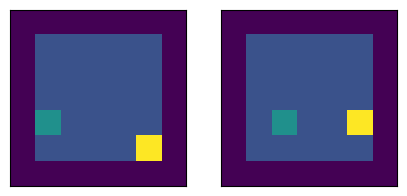

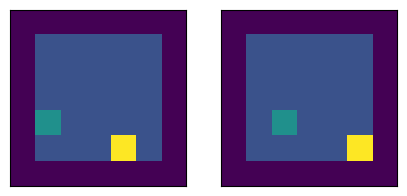

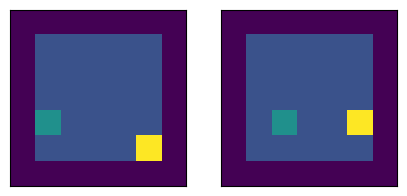

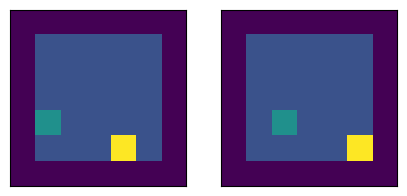

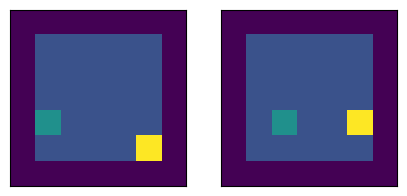

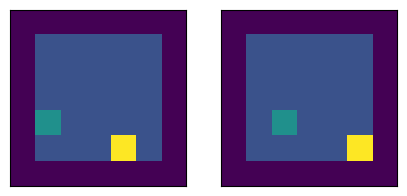

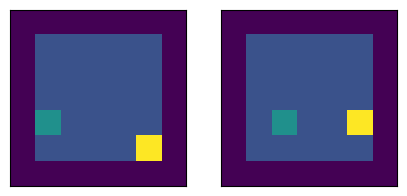

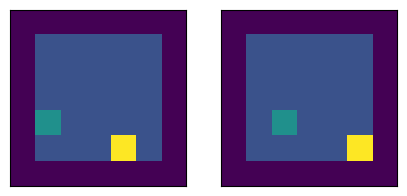

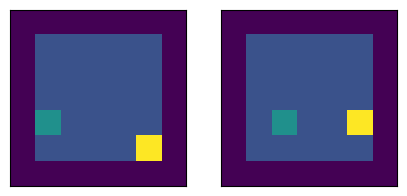

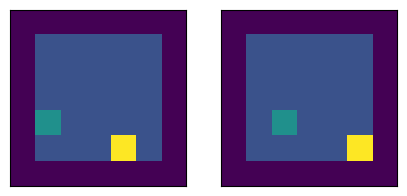

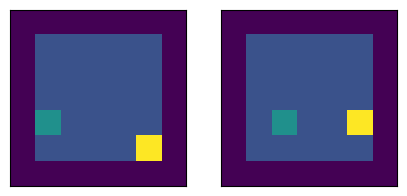

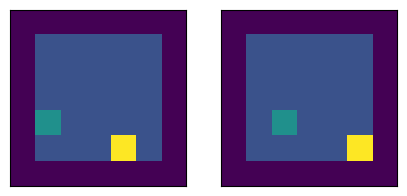

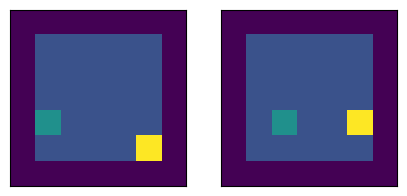

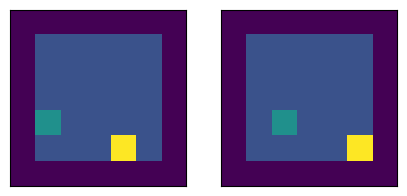

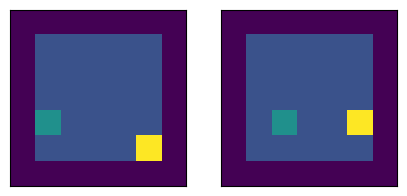

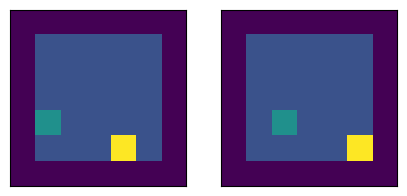

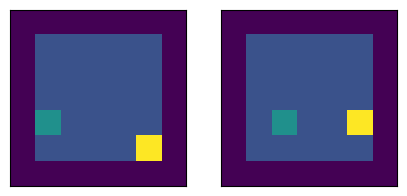

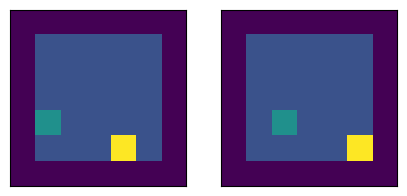

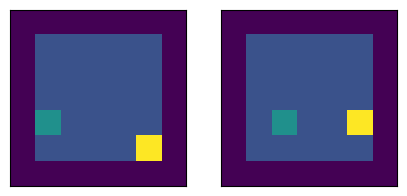

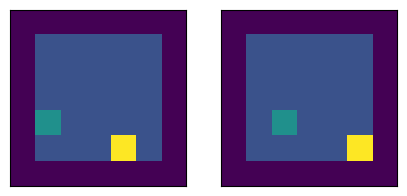

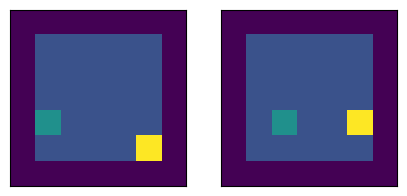

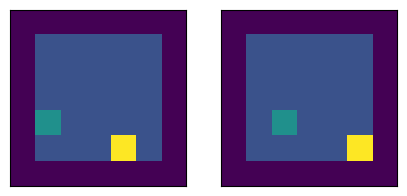

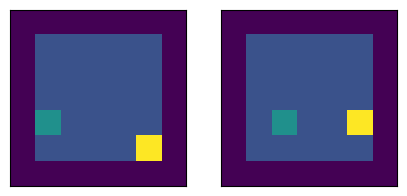

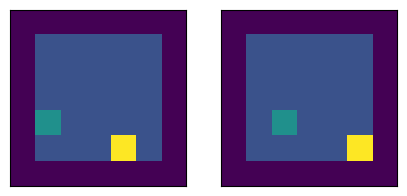

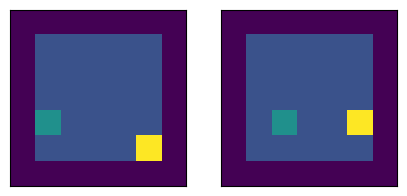

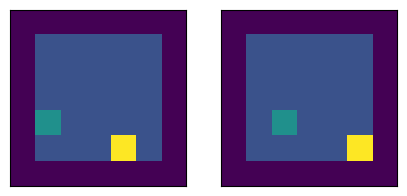

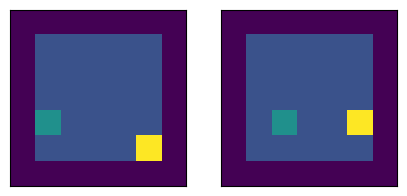

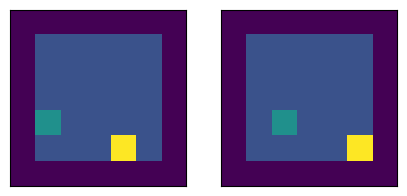

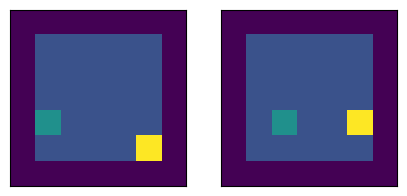

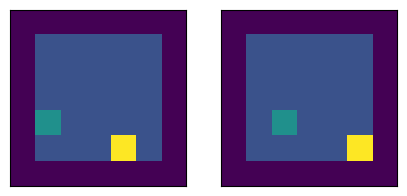

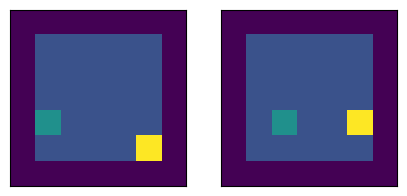

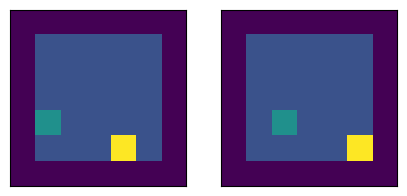

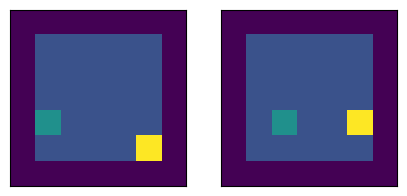

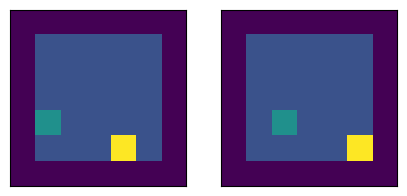

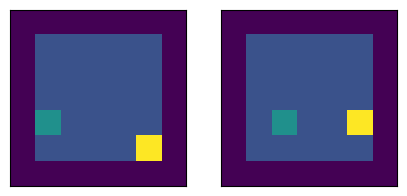

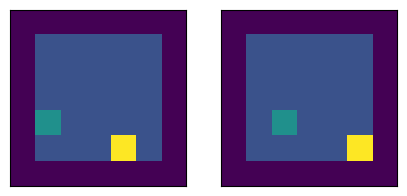

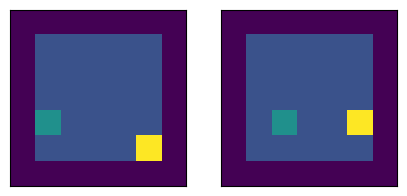

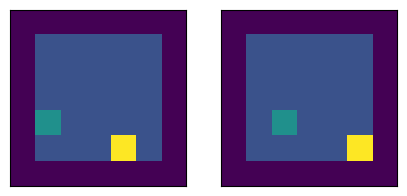

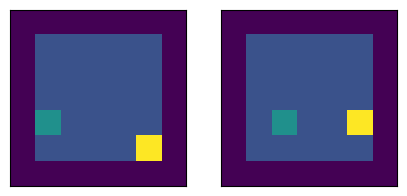

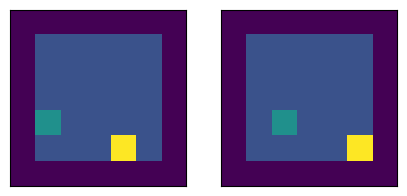

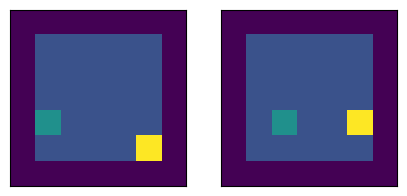

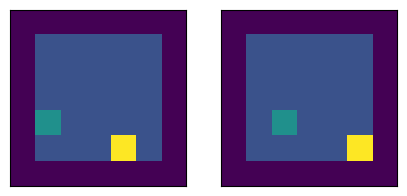

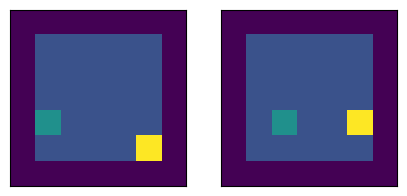

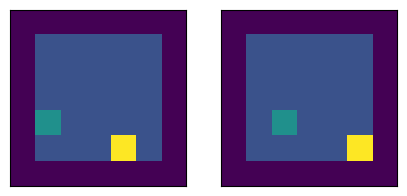

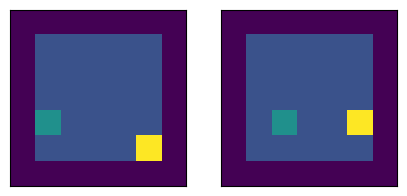

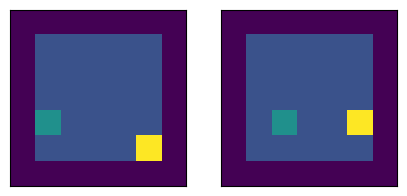

In [8]:
env_ = get_env(5, size=7)
input_shape = env_.to_state().shape[1:]

GAMMA = .9
ITERATIONS = 50
def play(agent, env, steps=50):
    # fruits = np.zeros(env.n_boards, dtype=int)
    rewards = np.zeros(env.n_boards, dtype=float)[:, None]

    for _ in trange(steps):
        states = env.to_state()
        # print(agent.select_actions_exploitation(states).reshape(-1, 1).shape)
        actions = agent.select_actions_exploitation_target(states).reshape(-1, 1)
        reward = env.move(actions)

        rewards = rewards + reward
        utils.display_boards(env, 5)
utils.display_boards(env_, 2)
play(Double_DQN_agent,env_, steps=ITERATIONS)
# play(env_,DQN_agent, ITERATIONS)
utils.display_boards(env_, 2)


In [ ]:
import AStar_Heuristic

agent = AStar_Heuristic.Heuristic_Agent(env_)
agent.execute(ITERATIONS)


In [ ]:
for iteration in trange(ITERATIONS):
    # get current state of the boards
    state = env_.to_state()
    
    with tf.GradientTape(persistent=True) as tape:
        """ 
        tensor of actions, consider that
            UP = 0
            RIGHT = 1
            DOWN = 2
            LEFT = 3
        """
        actions = [DQN_agent.select_action(state[i]) for i in range(env_.n_boards)]
        rewards = env_.move(actions)
        new_state = tf.constant(env_.to_state())

        # calculate the loss of whichever algorithm you have picked
        loss = ...

    gradient = tape.gradient(..., ...)
    optimizer.apply_gradients(zip(gradient, ...))

 ### Random policy reward
 
Just a baseline (not the one you are supposed to develop)

In [ ]:
random_env = get_env(100)
random_rewards = []

for _ in trange(1000):
    probs = tf.convert_to_tensor([[.25]*4]*random_env.n_boards)
    #sample actions
    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)
    # MDP update
    rewards = random_env.move(actions)
    random_rewards.append(np.mean(rewards))